# ETL

In [2]:
# Se importan las librerias usadas en el código
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv(r"D:\Programacion\DataScience_Henry\Proyecto_Individual1\Dataset\movies_dataset.csv")

C:\Users\lasso\AppData\Local\Temp\ipykernel_20356\857184425.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"D:\Programacion\DataScience_Henry\Proyecto_Individual1\Dataset\movies_dataset.csv")


In [4]:
data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [5]:
data.drop(columns=["video","imdb_id","adult","original_title","poster_path" , "homepage"],inplace=True)

In [6]:
data["budget"].value_counts()

0           36573
5000000       286
10000000      259
20000000      243
2000000       242
            ...  
923             1
72500000        1
2160000         1
4439832         1
1254040         1
Name: budget, Length: 1226, dtype: int64

In [7]:
data["revenue"].value_counts()

0.0           38052
12000000.0       20
11000000.0       19
10000000.0       19
2000000.0        18
              ...  
36565280.0        1
439564.0          1
35610100.0        1
10217873.0        1
1413000.0         1
Name: revenue, Length: 6863, dtype: int64

Por los valores observador arriba, podemos deducir que la columna a crear a continuación (return), va a ser mayormente 0.

In [8]:
data.loc[data["revenue"].isna(),"revenue"]=0

In [9]:
data.loc[data["budget"].isna(),"budget"]=0

In [10]:
data.dropna(subset=["release_date"],inplace=True)

In [11]:
# Quedan bastantes datos nulos, pero como en las transformaciones nos dicen de hacer nada más que esos puntos señalados
# No se tocan.
data.isna().sum()

belongs_to_collection    40888
budget                       0
genres                       0
id                           0
original_language           11
overview                   941
popularity                   2
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                    249
spoken_languages             3
status                      83
tagline                  24981
title                        3
vote_average                 3
vote_count                   3
dtype: int64

In [12]:
data.shape

(45379, 18)

## Creo la columna "return"

In [13]:
# Verifico que sean de un tipo de dato divisible

print(type(data["revenue"][0]))
print(type(data["budget"][0]))
# La columna budget no puede simplemente pasarse a float ya que contiene valores que son string

<class 'numpy.float64'>
<class 'str'>


In [14]:
data["budget"]=pd.to_numeric(data["budget"],errors="coerce")
print(data["budget"].values)
print(type(data["budget"][0]))

[30000000. 65000000.        0. ...        0.        0.        0.]
<class 'numpy.float64'>


In [15]:
data["budget"].value_counts()

0.0            36490
5000000.0        286
10000000.0       259
20000000.0       243
2000000.0        242
               ...  
270000000.0        1
923.0              1
72500000.0         1
2160000.0          1
1254040.0          1
Name: budget, Length: 1223, dtype: int64

In [16]:
# Ahora la idea es hacer la división pero con un try and except
# donde si la división va a tirar un error, sea porque budget es cero o string,
# se le deja el valor cero a la nueva columna.
columna=[]
for i, j in zip(data["revenue"], data["budget"]):
    if j!=0:
        try:
            columna.append(float(i)/(float(j)))
        except:
            columna.append(0)
    else:
        columna.append(0)

# Agrego la columna "revenue"
data["return"]=columna

In [17]:
data["return"].value_counts()

0.000000     39995
1.000000        20
2.000000        12
4.000000        11
5.000000         8
             ...  
17.000000        1
0.277950         1
5.411653         1
4.777778         1
0.282600         1
Name: return, Length: 5232, dtype: int64

## Creo la columna "release_year"
Va a tener los años en los que salió la pelicula, esta información la sacamos de la columna "release_date", a la cual justamente paso anteriormente a tipo timestamp, asi utilizando los valores de este tipo de datos se vuelve mucho más fácil el conseguir esta información.


In [18]:
data["release_date"] = pd.to_datetime(data["release_date"], format="%Y-%m-%d", errors="coerce")

In [19]:
print(type(data["release_date"][0]))
print(data["release_date"][0])
print((data["release_date"][0]).year)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1995-10-30 00:00:00
1995


In [20]:
# En este caso, utilizamos el atributo dt(datetime) para acceder a las propiedades de fecha y hora de la columna 'fecha'
# luego aplicamos el método year para extraer el año. 

data["release_year"]=data["release_date"].dt.year

In [21]:
data[data["release_year"].isna()]

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,return,release_year
19730,0.065736,NaN,"[{'name': 'Carousel Productions', 'id': 11176}...",1997-08-20,104.0,Released,NaN,False,6.0,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,1.931659,NaN,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",2012-09-29,68.0,Released,NaN,False,7.0,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,2.185485,NaN,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",2014-01-01,82.0,Released,Beware Of Frost Bites,False,4.3,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data[data["release_date"].isna()]

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,return,release_year
19730,0.065736,NaN,"[{'name': 'Carousel Productions', 'id': 11176}...",1997-08-20,104.0,Released,NaN,False,6.0,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,1.931659,NaN,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",2012-09-29,68.0,Released,NaN,False,7.0,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,2.185485,NaN,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",2014-01-01,82.0,Released,Beware Of Frost Bites,False,4.3,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data[data["budget"].isna()]

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,return,release_year
19730,0.065736,NaN,"[{'name': 'Carousel Productions', 'id': 11176}...",1997-08-20,104.0,Released,NaN,False,6.0,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,1.931659,NaN,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",2012-09-29,68.0,Released,NaN,False,7.0,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,2.185485,NaN,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",2014-01-01,82.0,Released,Beware Of Frost Bites,False,4.3,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Noté gran coincidencia con respecto a la aparición de estos tres 
# en lo que viene a ser valores nulos, y parecen tener bastante errores
# al ser los tres inutilizables, tome la decisión de directamente quitarlos del dataframe

data.drop(labels=[19730,29503,35587],axis=0,inplace=True)

# Ahora me parece más limpio, y solo se quitaron tres lineas las cuales 
# no se podía distinguir sus datos, además de estar mayormente vacios, estaban intercambiados los valores
# (no sé exactamente de que forma se deberían reordenar)

In [25]:
data.isna().sum()

belongs_to_collection    40888
budget                       0
genres                       0
id                           0
original_language           11
overview                   941
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                    246
spoken_languages             0
status                      80
tagline                  24978
title                        0
vote_average                 0
vote_count                   0
return                       0
release_year                 0
dtype: int64

Acomodo las columas por gusto

In [26]:
data["id_pelicula"]=pd.to_numeric(data["id"],downcast="integer")

In [27]:
# La forma en la que yo quiero ordenadas las columnas
data=data[['id_pelicula', 'title','overview','status','runtime','popularity','belongs_to_collection','tagline','genres','original_language','spoken_languages','vote_average','vote_count','release_date','release_year','production_countries','production_companies','budget','revenue','return']]

In [28]:
data.head(1)

,id_pelicula,title,overview,status,runtime,popularity,belongs_to_collection,tagline,genres,original_language,spoken_languages,vote_average,vote_count,release_date,release_year,production_countries,production_companies,budget,revenue,return
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,81.0,21.946943,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"[{'iso_639_1': 'en', 'name': 'English'}]",7.7,5415.0,1995-10-30,1995.0,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Pixar Animation Studios', 'id': 3}]",30000000.0,373554033.0,12.451801


# ETL primer csv
Para finalizar el etl de este csv, asi más adelante al desanidar los valores son los mismos al original, voy a hacer un drop_duplicates() para que todas las filas repetidas se eliminen.
Luego voy a cambiar el id_pelicula, asi los id repetidos se van. Voy a utilizar como nuevos valores de id los valores de los indices de las filas.

In [29]:
data['id_pelicula'].value_counts()

141971    3
97995     2
10991     2
109962    2
119916    2
         ..
40594     1
23104     1
37605     1
91727     1
461257    1
Name: id_pelicula, Length: 45346, dtype: int64

In [30]:
data.drop_duplicates(inplace=True)

In [31]:
data['id_pelicula'].value_counts()

69234     2
109962    2
4912      2
77221     2
15028     2
         ..
39452     1
94917     1
107643    1
64651     1
461257    1
Name: id_pelicula, Length: 45346, dtype: int64

In [32]:
a = data['id_pelicula'].value_counts()

In [33]:
a[a==2]

69234     2
109962    2
4912      2
77221     2
15028     2
99080     2
10991     2
12600     2
14788     2
22649     2
132641    2
97995     2
110428    2
84198     2
159849    2
13209     2
265189    2
Name: id_pelicula, dtype: int64

In [34]:
# son duplicados pero no los detecta como tal
data[data['id_pelicula']==69234]

,id_pelicula,title,overview,status,runtime,popularity,belongs_to_collection,tagline,genres,original_language,spoken_languages,vote_average,vote_count,release_date,release_year,production_countries,production_companies,budget,revenue,return
9576,69234,The Phantom of the Opera,Count de Chagnie has discovered Christine's si...,Released,168.0,0.441872,NaN,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",5.0,3.0,1990-03-18,1990.0,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...","[{'name': 'Beta Film', 'id': 1080}, {'name': '...",10000000.0,0.0,0.0
26625,69234,The Phantom of the Opera,Count de Chagnie has discovered Christine's si...,Released,168.0,0.43849,NaN,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",5.0,3.0,1990-03-18,1990.0,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...","[{'name': 'Beta Film', 'id': 1080}, {'name': '...",10000000.0,0.0,0.0


In [35]:
# Vamos a ver los otros casos duplicados

In [36]:
data[data['id_pelicula']==109962 ]

,id_pelicula,title,overview,status,runtime,popularity,belongs_to_collection,tagline,genres,original_language,spoken_languages,vote_average,vote_count,release_date,release_year,production_countries,production_companies,budget,revenue,return
5710,109962,Rich and Famous,Two literary women compete for 20 years: one w...,Released,115.0,12.180836,NaN,"From the very beginning, they knew they'd be f...","[{'id': 18, 'name': 'Drama'}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]",4.9,7.0,1981-09-23,1981.0,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...",0.0,0.0,0.0
20899,109962,Rich and Famous,Two literary women compete for 20 years: one w...,Released,115.0,10.396878,NaN,"From the very beginning, they knew they'd be f...","[{'id': 18, 'name': 'Drama'}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]",4.9,7.0,1981-09-23,1981.0,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...",0.0,0.0,0.0


In [37]:
data[data['id_pelicula']==4912]

,id_pelicula,title,overview,status,runtime,popularity,belongs_to_collection,tagline,genres,original_language,spoken_languages,vote_average,vote_count,release_date,release_year,production_countries,production_companies,budget,revenue,return
5865,4912,Confessions of a Dangerous Mind,"Television made him famous, but his biggest hi...",Released,113.0,11.331072,NaN,Some things are better left top secret.,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",en,"[{'iso_639_1': 'en', 'name': 'English'}]",6.6,281.0,2002-12-30,2002.0,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Miramax Films', 'id': 14}, {'name':...",30000000.0,33013805.0,1.10046
33826,4912,Confessions of a Dangerous Mind,"Television made him famous, but his biggest hi...",Released,113.0,7.645827,NaN,Some things are better left top secret.,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",en,"[{'iso_639_1': 'en', 'name': 'English'}]",6.6,281.0,2002-12-30,2002.0,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Miramax Films', 'id': 14}, {'name':...",30000000.0,33013805.0,1.10046


In [38]:
data[data['id_pelicula']==77221]

,id_pelicula,title,overview,status,runtime,popularity,belongs_to_collection,tagline,genres,original_language,spoken_languages,vote_average,vote_count,release_date,release_year,production_countries,production_companies,budget,revenue,return
11155,77221,Black Gold,"On the Arabian Peninsula in the 1930s, two war...",Released,130.0,6.652197,NaN,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",en,"[{'iso_639_1': 'en', 'name': 'English'}]",5.9,77.0,2011-12-21,2011.0,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...","[{'name': 'France 2 Cinéma', 'id': 83}, {'name...",40000000.0,5446000.0,0.13615
20843,77221,Black Gold,"On the Arabian Peninsula in the 1930s, two war...",Released,130.0,6.475665,NaN,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",en,"[{'iso_639_1': 'en', 'name': 'English'}]",5.9,77.0,2011-12-21,2011.0,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...","[{'name': 'France 2 Cinéma', 'id': 83}, {'name...",40000000.0,5446000.0,0.13615


In [39]:
data[data['id_pelicula']==99080]

,id_pelicula,title,overview,status,runtime,popularity,belongs_to_collection,tagline,genres,original_language,spoken_languages,vote_average,vote_count,release_date,release_year,production_countries,production_companies,budget,revenue,return
16167,99080,The Viking,"Originally called White Thunder, American prod...",Released,70.0,0.002362,NaN,Actually produced during the Great Newfoundlan...,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",en,"[{'iso_639_1': 'en', 'name': 'English'}]",0.0,0.0,1931-06-21,1931.0,[],[],0.0,0.0,0.0
38871,99080,The Viking,"Originally called White Thunder, American prod...",Released,70.0,0.002362,NaN,Actually produced during the Great Newfoundlan...,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",en,"[{'iso_639_1': 'en', 'name': 'English'}]",0.0,0.0,1931-06-21,1931.0,[],[],0.0,0.0,0.0


In [40]:
data[data['id_pelicula']==10991]

,id_pelicula,title,overview,status,runtime,popularity,belongs_to_collection,tagline,genres,original_language,spoken_languages,vote_average,vote_count,release_date,release_year,production_countries,production_companies,budget,revenue,return
4114,10991,Pokémon: Spell of the Unknown,When Molly Hale's sadness of her father's disa...,Released,93.0,10.264597,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",Pokémon: Spell of the Unknown,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",ja,"[{'iso_639_1': 'en', 'name': 'English'}]",6.0,143.0,2000-07-08,2000.0,"[{'iso_3166_1': 'JP', 'name': 'Japan'}]","[{'name': 'TV Tokyo', 'id': 3034}, {'name': '4...",16000000.0,68411275.0,4.275705
44821,10991,Pokémon: Spell of the Unknown,When Molly Hale's sadness of her father's disa...,Released,93.0,6.480376,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",Pokémon: Spell of the Unknown,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",ja,"[{'iso_639_1': 'en', 'name': 'English'}]",6.0,144.0,2000-07-08,2000.0,"[{'iso_3166_1': 'JP', 'name': 'Japan'}]","[{'name': 'TV Tokyo', 'id': 3034}, {'name': '4...",16000000.0,68411275.0,4.275705


In [41]:
data[data['id_pelicula']==12600]

,id_pelicula,title,overview,status,runtime,popularity,belongs_to_collection,tagline,genres,original_language,spoken_languages,vote_average,vote_count,release_date,release_year,production_countries,production_companies,budget,revenue,return
5535,12600,Pokémon 4Ever: Celebi - Voice of the Forest,"All your favorite Pokémon characters are back,...",Released,75.0,7.072301,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",ja,"[{'iso_639_1': 'ja', 'name': '日本語'}]",5.7,82.0,2001-07-06,2001.0,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",[],0.0,28023563.0,0.0
44826,12600,Pokémon 4Ever: Celebi - Voice of the Forest,"All your favorite Pokémon characters are back,...",Released,75.0,6.080108,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",ja,"[{'iso_639_1': 'ja', 'name': '日本語'}]",5.7,82.0,2001-07-06,2001.0,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",[],0.0,28023563.0,0.0


In [42]:
data[data['id_pelicula']==14788]

,id_pelicula,title,overview,status,runtime,popularity,belongs_to_collection,tagline,genres,original_language,spoken_languages,vote_average,vote_count,release_date,release_year,production_countries,production_companies,budget,revenue,return
10419,14788,Bubble,Set against the backdrop of a decaying Midwest...,Released,73.0,3.185256,NaN,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",en,"[{'iso_639_1': 'en', 'name': 'English'}]",6.4,36.0,2005-09-03,2005.0,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Magnolia Pictures', 'id': 1030}, {'...",1600000.0,0.0,0.0
12066,14788,Bubble,Set against the backdrop of a decaying Midwest...,Released,73.0,3.008299,NaN,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",en,"[{'iso_639_1': 'en', 'name': 'English'}]",6.4,36.0,2005-09-03,2005.0,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Magnolia Pictures', 'id': 1030}, {'...",1600000.0,0.0,0.0


In [43]:
data[data['id_pelicula']==22649]

,id_pelicula,title,overview,status,runtime,popularity,belongs_to_collection,tagline,genres,original_language,spoken_languages,vote_average,vote_count,release_date,release_year,production_countries,production_companies,budget,revenue,return
949,22649,A Farewell to Arms,British nurse Catherine Barkley (Helen Hayes) ...,Released,89.0,1.914697,NaN,Every woman who has loved will understand,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",en,"[{'iso_639_1': 'en', 'name': 'English'}]",6.2,29.0,1932-12-08,1932.0,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Paramount Pictures', 'id': 4}]",4.0,25.0,6.25
15074,22649,A Farewell to Arms,British nurse Catherine Barkley (Helen Hayes) ...,Released,89.0,2.411191,NaN,Every woman who has loved will understand,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",en,"[{'iso_639_1': 'en', 'name': 'English'}]",6.2,29.0,1932-12-08,1932.0,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Paramount Pictures', 'id': 4}]",4.0,25.0,6.25


## Usar el otro archivo csv provisto
Voy a ver cómo estan los datos y de ahí intentar ponerlos de manera comoda para poder trabajar con ambos dataframe a la vez

In [44]:
df2=pd.read_csv(r"D:\Programacion\DataScience_Henry\Proyecto_Individual1\Dataset\credits.csv")

In [45]:
# Agrego el "id_pelicula" 
# asi me aseguro que el mismo id tenga el mismo nombre en todos los df
df2["id_pelicula"]=df2["id"]
df2.drop(columns=["id"],inplace=True)

In [46]:
df2

,cast,crew,id_pelicula
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


### Desanidar sus datos
En esta tabla en sumamente necesario desanidar para obtener la información que queremos.

In [47]:
df2

,cast,crew,id_pelicula
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [48]:
import pandas as pd
import ast

# Función proveida por chatgpt para ayudar a desanidar
# Al ver cómo funcionan tengo que extraer los subdataframe que deja en la serie devuelta.

def desanidar_cast(row):
    cast_data = ast.literal_eval(row['cast'])
    desanidado = pd.json_normalize(cast_data)
    desanidado['id_pelicula'] = row['id_pelicula']
    return desanidado

# Repetir la misma función cambiando la variable -hay que ver si funciona-
def desanidar_crew(row):
    cast_data = ast.literal_eval(row['crew'])
    desanidado = pd.json_normalize(cast_data)
    desanidado['id_pelicula'] = row['id_pelicula']
    return desanidado

In [49]:
cast=df2.apply(desanidar_cast, axis=1).reset_index(drop=True)

In [50]:
crew=df2.apply(desanidar_crew, axis=1).reset_index(drop=True)

In [51]:
# Me devuelve una serie
# Pero si la hago dataframe, es como si quedara una columna en la que cada fila 
# Es un dataframe de cada uno de los datos que se querian separar de esa manera(desanidados)
print(cast)
print(type(cast))
pd.DataFrame(cast)

0            cast_id                character          ...
1            cast_id                       character   ...
2           cast_id                     character      ...
3           cast_id                  character         ...
4            cast_id              character            ...
                               ...                        
45471       cast_id character                 credit_id...
45472        cast_id              character            ...
45473        cast_id          character                ...
45474       cast_id character                 credit_id...
45475     Empty DataFrame
Columns: [id_pelicula]
Index: []
Length: 45476, dtype: object
<class 'pandas.core.series.Series'>


,0
0,cast_id character ...
1,cast_id character ...
2,cast_id character ...
3,cast_id character ...
4,cast_id character ...
...,...
45471,cast_id character credit_id...
45472,cast_id character ...
45473,cast_id character ...
45474,cast_id character credit_id...


In [52]:
print(type(crew[0]))
crew[0]

<class 'pandas.core.frame.DataFrame'>


,credit_id,department,gender,id,job,name,profile_path,id_pelicula
0,52fe4284c3a36847f8024f49,Directing,2,7879,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg,862
1,52fe4284c3a36847f8024f4f,Writing,2,12891,Screenplay,Joss Whedon,/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg,862
2,52fe4284c3a36847f8024f55,Writing,2,7,Screenplay,Andrew Stanton,/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg,862
3,52fe4284c3a36847f8024f5b,Writing,2,12892,Screenplay,Joel Cohen,/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg,862
4,52fe4284c3a36847f8024f61,Writing,0,12893,Screenplay,Alec Sokolow,/v79vlRYi94BZUQnkkyznbGUZLjT.jpg,862
...,...,...,...,...,...,...,...,...
101,589216c19251412dc2009cb9,Sound,1,1748724,Assistant Sound Editor,Susan Sanford,None,862
102,589216ccc3a3680973009274,Sound,0,1748725,Assistant Sound Editor,Susan Popovic,None,862
103,589216d79251412dc8009aa0,Sound,0,8067,Assistant Sound Editor,Dan Engstrom,None,862
104,589216e49251412dcd009a4f,Production,1,7902,Casting Consultant,Ruth Lambert,None,862


In [53]:
# Al verlo por separado, se nota cómo en cada fila quedaron en forma de dataframe
# Entonces lo que podría hacer es un ciclo que añada cada uno de los subdataframes
# A un solo dataframe mayor 
print(type(cast[0]))
cast[0]

<class 'pandas.core.frame.DataFrame'>


,cast_id,character,credit_id,gender,id,name,order,profile_path,id_pelicula
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,862
1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg,862
2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg,862
3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg,862
4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg,862
5,19,Hamm (voice),52fe4284c3a36847f8024fa9,2,7907,John Ratzenberger,5,/yGechiKWL6TJDfVE2KPSJYqdMsY.jpg,862
6,20,Bo Peep (voice),52fe4284c3a36847f8024fad,1,8873,Annie Potts,6,/eryXT84RL41jHSJcMy4kS3u9y6w.jpg,862
7,26,Andy (voice),52fe4284c3a36847f8024fc1,0,1116442,John Morris,7,/vYGyvK4LzeaUCoNSHtsuqJUY15M.jpg,862
8,22,Sid (voice),52fe4284c3a36847f8024fb1,2,12901,Erik von Detten,8,/twnF1ZaJ1FUNUuo6xLXwcxjayBE.jpg,862
9,23,Mrs. Davis (voice),52fe4284c3a36847f8024fb5,1,12133,Laurie Metcalf,9,/unMMIT60eoBM2sN2nyR7EZ2BvvD.jpg,862


In [54]:
# El último elemento no es un dataframe con datos, asi que no lo vamos a considerar
cast[45475]

,id_pelicula


In [55]:
cast=list(cast)
df_cast=pd.concat(cast, ignore_index=True)

In [56]:
crew=list(crew)
df_crew=pd.concat(crew, ignore_index=True)

In [57]:
# Elimino las columnas que considero innecesarias
df_crew.drop(columns=["credit_id","profile_path"],inplace=True)

In [58]:
# Elimino las columnas que considero innecesarias
df_cast.drop(columns=["credit_id","profile_path"],inplace=True)

In [59]:
# Iba a usar esto, resulto en tardar más de 20 min, busque la manera de optimizarlo mientras veia que tardaba
# me canse, lo frene, y aplique la manera encontrada(la de arriba)
'''
for i in range(len(cast)-1):
    if i ==0:
        df_crew=cast[0]
    else:
        df_crew=pd.concat([df_crew,cast[i]],ignore_index=True)
'''

'\nfor i in range(len(cast)-1):\n    if i ==0:\n        df_crew=cast[0]\n    else:\n        df_crew=pd.concat([df_crew,cast[i]],ignore_index=True)\n'

In [60]:
# Queria verificar que cast_id sirviera como columna id, pero justamente no lo hace.
# Por lo tanto tal vez tenga otros usos para las personas originales de los datos
# Pero para busquedas y comparaciones no se pueden usar.
# (otro caso es el id, que si bien se repite, donde esta el original y no se debería repetir es en la tabla de datos, que seria la tabla dimensional)

df_cast["cast_id"].value_counts()

4.0       26777
5.0       25655
3.0       25594
6.0       24006
2.0       22846
          ...  
344.0         1
1099.0        1
1098.0        1
1097.0        1
438.0         1
Name: cast_id, Length: 574, dtype: int64

In [61]:
df_crew

,department,gender,id,job,name,id_pelicula
0,Directing,2.0,7879.0,Director,John Lasseter,862
1,Writing,2.0,12891.0,Screenplay,Joss Whedon,862
2,Writing,2.0,7.0,Screenplay,Andrew Stanton,862
3,Writing,2.0,12892.0,Screenplay,Joel Cohen,862
4,Writing,0.0,12893.0,Screenplay,Alec Sokolow,862
...,...,...,...,...,...,...
464309,Sound,0.0,549356.0,Original Music Composer,Richard McHugh,67758
464310,Camera,2.0,58818.0,Director of Photography,João Fernandes,67758
464311,Directing,0.0,1085341.0,Director,Yakov Protazanov,227506
464312,Production,2.0,1195656.0,Producer,Joseph N. Ermolieff,227506


## Creo un df copia luego de las transformaciones necesarias

In [62]:
# Como todavía no sé cómo se va a trabajar la parte de machine learning
# Pero esta limpieza de datos me parece necesaria
# Voy a crear una copia del dataframe tal como esta ahora
# (Todavía falta desanidar los datos, cuando lo haga veo si lo vuelvo a copiar)

data2= data.copy()
# Más adelante decido si sirve o no.

Como tabla de hechos se nota que tiene id repetidos, no voy a tocar esto hasta desanidar pero por recomendación dijeron de directamente no hacer drop_duplicates.

In [63]:
data["id_pelicula"].value_counts()

69234     2
109962    2
4912      2
77221     2
15028     2
         ..
39452     1
94917     1
107643    1
64651     1
461257    1
Name: id_pelicula, Length: 45346, dtype: int64

In [64]:
data[data["id_pelicula"]==141971]

,id_pelicula,title,overview,status,runtime,popularity,belongs_to_collection,tagline,genres,original_language,spoken_languages,vote_average,vote_count,release_date,release_year,production_countries,production_companies,budget,revenue,return
13261,141971,Blackout,Recovering from a nail gun shot to the head an...,Released,108.0,0.411949,NaN,Which one is the first to return - memory or t...,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",fi,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",6.7,3.0,2008-12-26,2008.0,"[{'iso_3166_1': 'FI', 'name': 'Finland'}]","[{'name': 'Filmiteollisuus Fine', 'id': 5166}]",0.0,0.0,0.0


## Es hora de desanidar los datos

Observando las columnas nuevamente, ya habiendo desanidado la otra tabla voy a desanidar todas las columnas de esta tabla, pero solo voy a utilizar aquella que contenga el dato para el cual originalmente era esa columna que se encuentra anidada

In [65]:
data

,id_pelicula,title,overview,status,runtime,popularity,belongs_to_collection,tagline,genres,original_language,spoken_languages,vote_average,vote_count,release_date,release_year,production_countries,production_companies,budget,revenue,return
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,81.0,21.946943,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"[{'iso_639_1': 'en', 'name': 'English'}]",7.7,5415.0,1995-10-30,1995.0,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Pixar Animation Studios', 'id': 3}]",30000000.0,373554033.0,12.451801
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Released,104.0,17.015539,NaN,Roll the dice and unleash the excitement!,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",6.9,2413.0,1995-12-15,1995.0,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...",65000000.0,262797249.0,4.043035
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Released,101.0,11.7129,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",Still Yelling. Still Fighting. Still Ready for...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,"[{'iso_639_1': 'en', 'name': 'English'}]",6.5,92.0,1995-12-22,1995.0,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",0.0,0.0,0.000000
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Released,127.0,3.859495,NaN,Friends are the people who let you be yourself...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"[{'iso_639_1': 'en', 'name': 'English'}]",6.1,34.0,1995-12-22,1995.0,"[{'iso_3166_1': 'US', 'name': 'United States o...",[{'name': 'Twentieth Century Fox Film Corporat...,16000000.0,81452156.0,5.090760
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Released,106.0,8.387519,"{'id': 96871, 'name': 'Father of the Bride Col...",Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]",5.7,173.0,1995-02-10,1995.0,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Sandollar Productions', 'id': 5842}...",0.0,76578911.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,30840,Robin Hood,"Yet another version of the classic epic, with ...",Released,104.0,5.683753,NaN,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",en,"[{'iso_639_1': 'en', 'name': 'English'}]",5.7,26.0,1991-05-13,1991.0,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...","[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...",0.0,0.0,0.000000
45462,111109,Century of Birthing,An artist struggles to finish his work while a...,Released,360.0,0.178241,NaN,NaN,"[{'id': 18, 'name': 'Drama'}]",tl,"[{'iso_639_1': 'tl', 'name': ''}]",9.0,3.0,2011-11-17,2011.0,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]","[{'name': 'Sine Olivia', 'id': 19653}]",0.0,0.0,0.000000
45463,67758,Betrayal,"When one of her hits goes wrong, a professiona...",Released,90.0,0.903007,NaN,A deadly game of wits.,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",en,"[{'iso_639_1': 'en', 'name': 'English'}]",3.8,6.0,2003-08-01,2003.0,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'American World Pictures', 'id': 6165}]",0.0,0.0,0.000000
45464,227506,Satan Triumphant,"In a small town live two brothers, one a minis...",Released,87.0,0.003503,NaN,NaN,[],en,[],0.0,0.0,1917-10-21,1917.0,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]","[{'name': 'Yermoliev', 'id': 88753}]",0.0,0.0,0.000000


In [66]:
data["belongs_to_collection"].unique()

array(["{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}",
       nan,
       "{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg', 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'}",
       ...,
       "{'id': 148603, 'name': 'Ducobu Collection', 'poster_path': '/rd7AWZUy2QFPIblNWToVmdfXQcA.jpg', 'backdrop_path': '/7mzKmoIrvGapvsSbAVlX4HtCnFj.jpg'}",
       "{'id': 152918, 'name': 'Mister Blot Collection', 'poster_path': '/44PYEwwjGts8pAob59RHd6zlkKc.jpg', 'backdrop_path': '/5uoPsNiFpUYNamSGqE8okN27VRK.jpg'}",
       "{'id': 200641, 'name': 'Red Lotus Collection', 'poster_path': '/yf9Eod9ANXyHTzDpAxz9ezgvlL4.jpg', 'backdrop_path': '/3fhHbLeO3DqdHvgHg5szs399eBb.jpg'}"],
      dtype=object)

In [67]:
# traigo la función anteriormente usada
# Cambio en cada una la columna a desanidar
# En este caso voy a terminar con dos columnas id, asi que voy a renombrar el id de pelicula como "id_pelicula" (realmente no se si siquiera lo necesitemos, pero por si acaso)
# Note que me salia error y se me ocurrió que podía ser debido a que en este caso las columnas tienen valores vacios.
# Asi que ahora le agrego a las funciones que es caso de vacios regrese un dataframe vacio.

def desanidar_belongs(row):
    cast_data=row['belongs_to_collection']
    if np.all(pd.isna(cast_data)) or cast_data == '':
        return pd.DataFrame()  # Retorna un DataFrame vacío si la celda está vacía
    cast_data = ast.literal_eval(cast_data)
    desanidado = pd.json_normalize(cast_data)
    desanidado['id_pelicula'] = row['id_pelicula']
    desanidado['revenue']=row['revenue']
    desanidado['budget']=row['budget']
    return desanidado

def desanidar_genres(row):
    cast_data=row['genres']
    if np.all(pd.isna(cast_data)) or cast_data == '':
        return pd.DataFrame()  # Retorna un DataFrame vacío si la celda está vacía
    cast_data = ast.literal_eval(cast_data)
    desanidado = pd.json_normalize(cast_data)
    desanidado['id_pelicula'] = row['id_pelicula']
    return desanidado

def desanidar_spoken_languages(row):
    cast_data=row['spoken_languages']
    if np.all(pd.isna(cast_data))  or cast_data == '':
        return pd.DataFrame()  # Retorna un DataFrame vacío si la celda está vacía
    cast_data = ast.literal_eval(cast_data)
    desanidado = pd.json_normalize(cast_data)
    desanidado['id_pelicula'] = row['id_pelicula']
    return desanidado

def desanidar_production_countries(row):
    cast_data=row['production_countries']
    if np.all(pd.isna(cast_data)) or cast_data == '':
        return pd.DataFrame()  # Retorna un DataFrame vacío si la celda está vacía
    cast_data = ast.literal_eval(cast_data)
    desanidado = pd.json_normalize(cast_data)
    desanidado['id_pelicula'] = row['id_pelicula']
    return desanidado

def desanidar_production_companies(row):
    cast_data=row['production_companies']
    if np.all(pd.isna(cast_data))  or cast_data == '':
        return pd.DataFrame()  # Retorna un DataFrame vacío si la celda está vacía
    cast_data = ast.literal_eval(row['production_companies'])
    desanidado = pd.json_normalize(cast_data)
    desanidado['id_pelicula'] = row['id_pelicula']
    desanidado['revenue']=row['revenue']
    return desanidado

Desanido todas las columnas

In [68]:
des_belongs=data.apply(desanidar_belongs, axis=1).reset_index(drop=True)

In [69]:
des_genres=data.apply(desanidar_genres, axis=1).reset_index(drop=True)

In [70]:
des_spoken_languages=data.apply(desanidar_spoken_languages, axis=1).reset_index(drop=True)

In [71]:
des_production_countries=data.apply(desanidar_production_countries, axis=1).reset_index(drop=True)

In [72]:
des_production_companies=data.apply(desanidar_production_companies, axis=1).reset_index(drop=True)

Hago los pasos hechos en el dataframe anterior para unir todos los dataframes generados en cada dato de la serie.

In [73]:
# Hago lista a la serie para poder concatenar cada uno de los dataframes ahora enlistados

des_belongs=list(des_belongs)
df_belongs_to_collection=pd.concat(des_belongs, ignore_index=True)

# Ahora repetimos lo mismo en el resto de df

In [74]:
df_belongs_to_collection.drop(columns=["poster_path","backdrop_path"],inplace=True)
df_belongs_to_collection

,id,name,id_pelicula,revenue,budget
0,10194,Toy Story Collection,862,373554033.0,30000000.0
1,119050,Grumpy Old Men Collection,15602,0.0,0.0
2,96871,Father of the Bride Collection,11862,76578911.0,0.0
3,645,James Bond Collection,710,352194034.0,58000000.0
4,117693,Balto Collection,21032,11348324.0,0.0
...,...,...,...,...,...
4483,37261,The Carry On Collection,24568,0.0,0.0
4484,37261,The Carry On Collection,19307,0.0,0.0
4485,37261,The Carry On Collection,21251,0.0,0.0
4486,477208,DC Super Hero Girls Collection,460135,0.0,0.0


In [75]:
# genres
des_genres=list(des_genres)
df_genres=pd.concat(des_genres, ignore_index=True)

In [76]:
df_genres

,id,name,id_pelicula
0,16.0,Animation,862
1,35.0,Comedy,862
2,10751.0,Family,862
3,12.0,Adventure,8844
4,14.0,Fantasy,8844
...,...,...,...
90999,10749.0,Romance,30840
91000,18.0,Drama,111109
91001,28.0,Action,67758
91002,18.0,Drama,67758


In [77]:
#spoken_languages
des_spoken_languages=list(des_spoken_languages)
df_spoken_languages=pd.concat(des_spoken_languages, ignore_index=True)

In [78]:
df_spoken_languages

,iso_639_1,name,id_pelicula
0,en,English,862
1,en,English,8844
2,fr,Français,8844
3,en,English,15602
4,en,English,31357
...,...,...,...
53257,en,English,222848
53258,en,English,30840
53259,tl,,111109
53260,en,English,67758


In [79]:
#production_countries
des_production_countries=list(des_production_countries)
df_production_countries=pd.concat(des_production_countries, ignore_index=True)


In [80]:
df_production_countries

,iso_3166_1,name,id_pelicula
0,US,United States of America,862
1,US,United States of America,8844
2,US,United States of America,15602
3,US,United States of America,31357
4,US,United States of America,11862
...,...,...,...
49373,US,United States of America,30840
49374,PH,Philippines,111109
49375,US,United States of America,67758
49376,RU,Russia,227506


In [81]:
#production_companies
des_production_companies=list(des_production_companies)
df_production_companies=pd.concat(des_production_companies, ignore_index=True)

In [82]:
df_production_companies

,name,id,id_pelicula,revenue
0,Pixar Animation Studios,3.0,862,373554033.0
1,TriStar Pictures,559.0,8844,262797249.0
2,Teitler Film,2550.0,8844,262797249.0
3,Interscope Communications,10201.0,8844,262797249.0
4,Warner Bros.,6194.0,15602,0.0
...,...,...,...,...
70486,20th Century Fox Television,16323.0,30840,0.0
70487,CanWest Global Communications,38978.0,30840,0.0
70488,Sine Olivia,19653.0,111109,0.0
70489,American World Pictures,6165.0,67758,0.0


In [83]:
# Ahora que tengo todos los df con las columnas desanidadas, 
# voy a eliminar esas columnas para que no ocupen espacio y esten innecesariamente
data.drop(columns=["belongs_to_collection","genres","spoken_languages","production_countries","production_companies"],inplace=True)

# Funciones para la API

def peliculas_idioma( Idioma: str ): Se ingresa un idioma. Debe devolver la cantidad de películas producidas en ese idioma.<br>
 Ejemplo de retorno: X cantidad de películas fueron estrenadas en idioma

In [84]:
data["original_language"].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [85]:
data["original_language"][data["original_language"]=='en'].count()

32195

In [86]:
def peliculas_idioma(idioma):
    '''
    - Ingresa el idioma, sale la cantidad de peliculas estrenadas en ese idioma.

    - Debe ingresar el abreviado del idioma a buscar, las opciones son las de la siguiente lista:
    ['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
    'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
    'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
    'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
    'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
    'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
    'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
    'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
    'lb', 'si']
    '''
    idioma=idioma.strip()
    count1= str(data["original_language"][data["original_language"]==idioma].count())

    return count1 + ' cantidad de películas fueron estrenadas en "{}" '.format(idioma)

In [87]:
print(peliculas_idioma('en'))

32195 cantidad de películas fueron estrenadas en "en" 


def peliculas_duracion( Pelicula: str ): Se ingresa una pelicula. Debe devolver la duracion y el año.<br>
Ejemplo de retorno: X . Duración: x. Año: xx

In [89]:
def peliculas_duracion(Pelicula):
    '''
    Debe escribir el titulo correctamente, es decir, como esta escrito originalmente (buscar en internet), en inglés y con las mayúsculas correctas.
    Si hay una sola pelicula con ese nombre, devuelve la duración y su año de estreno.
    De haber más de una con ese nombre, devuelve una lista de duración y otra de los años, en las que coinciden sus ordenes (primer indice de la duración es de la pelicula que salió en el primer indice de los años, asi sucesivamente).
    En caso de escribir un nombre que no se encuentre en la base de datos, devuelve: "No hay pelicula con ese titulo".
    '''
    Pelicula=Pelicula.strip()
    cant=int(data["runtime"][data["title"]==Pelicula].count())
    df=data
    # Cambio los datos del año a int asi se ve mejor
    df["release_year"]=pd.to_numeric(df["release_year"],downcast="integer")
    if cant>1:
        dur=list(df["runtime"][df["title"]==Pelicula].values)
        Anio=list(df["release_year"][df["title"]==Pelicula].values)

    elif cant==1:
        dur=str(df["runtime"][df["title"]==Pelicula].values[0])
        Anio=str(int(df["release_year"][df["title"]==Pelicula].values[0])) 
    else:
        return "No hay pelicula con ese titulo"
       
    return "{}. Duración: {} min. Año:{}. ".format(Pelicula,dur,Anio)

In [88]:
data["title"].head(8)

0                      Toy Story
1                        Jumanji
2               Grumpier Old Men
3              Waiting to Exhale
4    Father of the Bride Part II
5                           Heat
6                        Sabrina
7                   Tom and Huck
Name: title, dtype: object

In [90]:
peliculas_duracion('Sabrina')

'Sabrina. Duración: [127.0, 113.0] min. Año:[1995, 1954]. '

In [91]:
Pelicula='Sabrina'.strip()

In [92]:
Pelicula='Jumanji'.strip()

In [93]:
dur=int(data["runtime"][data["title"]==Pelicula].count())
type(dur)

int

In [94]:
df=data
df["release_year"]=pd.to_numeric(df["release_year"],downcast="integer")

In [95]:
Anio=list(df["release_year"][df["title"]==Pelicula].values)
Anio

[1995]

In [96]:
dur=list(data["runtime"][data["title"]==Pelicula].values)
dur

[104.0]

In [97]:
peliculas_duracion('Jumanji')

'Jumanji. Duración: 104.0 min. Año:1995. '

In [98]:
a= peliculas_duracion("Toy Story")

In [99]:
a

'Toy Story. Duración: 81.0 min. Año:1995. '

def franquicia( Franquicia: str ): Se ingresa la franquicia, retornando la cantidad de peliculas, ganancia total y promedio.<br>
Ejemplo de retorno: La franquicia X posee X peliculas, una ganancia total de x y una ganancia promedio de xx

In [78]:
data.head(1)

,id_pelicula,title,overview,status,runtime,popularity,tagline,original_language,vote_average,vote_count,release_date,release_year,budget,revenue,return
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,81.0,21.946943,NaN,en,7.7,5415.0,1995-10-30,1995.0,30000000.0,373554033.0,12.451801


In [79]:
def franquicia(Franquicia:str):
    '''
    - Para esta función se debe escribir bien el nombre de la pelicula, exactamente al publicado oficial.
    - Luego del nombre de la pelicula se debe agregar la palabra "Collection", exactamente como esta escrita (sin las comillas).
    '''
    Franquicia=Franquicia.strip()
    df=df_belongs_to_collection[df_belongs_to_collection["name"]==Franquicia]
    
    # Me aseguro que esten en mismo tipo de dato.
    cant=float(df["name"].count())
    rev=float(df["revenue"].sum())
    if df.count().sum()==0:
        return "No se encuentra tal franquicia"
    else:
        if cant!=0:
            prom=str(rev/cant)
        else:
            prom=0
    return "La franquicia "+ Franquicia + " posee "+ str(cant) +" peliculas, una ganancia total de "+ str(rev) +" y una ganancia promedio de "+ prom +""

In [250]:
df=df_belongs_to_collection[df_belongs_to_collection["name"]=='a']

In [251]:
df['name'].count().sum()

0

In [242]:
df=df_belongs_to_collection.sort_values(by='revenue',ascending=False).head(5)

In [247]:
type(df['name'].count().sum())

numpy.int64

In [80]:
franquicia("Toy Story Collection")

'La franquicia Toy Story Collection posee 3 peliculas, una ganancia total de 1937890605.0 y una ganancia promedio de 645963535.0'

def peliculas_pais( Pais: str ): Se ingresa un país, retornando la cantidad de peliculas producidas en el mismo.<br>
Ejemplo de retorno: Se produjeron X películas en el país X

In [82]:
def peliculas_pais(Pais:str):
    '''
    - Recibe el Pais y devuelve la cantidad de peliculas producidas en este.
    - El idioma en el que se debe escribir el nombre del país es inglés, respetando los espacios y mayúsculas de cada nombre.
    - Si no le sale, verifique que esta escribiendo bien el país.
    '''
    Pais=Pais.strip()
    cant = df_production_countries["name"][df_production_countries["name"]==Pais].count()
    if cant==0:
        return "Este país no ha realizado peliculas o se encuentra mal escrito."
    
    return "Se produjeron " + str(cant) + " películas en el país " + Pais

In [81]:
df_production_countries["name"][df_production_countries["name"]=='United States of America'].count()

21147

In [83]:
peliculas_pais("United States of America")

'Se produjeron 21147 películas en el paísUnited States of America'

def productoras_exitosas( Productora: str ): Se ingresa la productora, entregandote el revenue total y la cantidad de peliculas que realizo.<br>
Ejemplo de retorno: La productora X ha tenido un revenue de x

In [86]:
def productoras_exitosas(Productora:str):
    '''
    - Recibe la productora y devuelve el revenue total que obtuvo y la cantidad de peliculas realizadas.
    '''
    Productora=Productora.strip()
    df=df_production_companies[df_production_companies['name']==Productora]
    if df['name'].count().sum()==0:
        return "No se encuentran datos de esta productora."

    suma=df['revenue'].sum()
    cant= df['name'].count()

    return "La productora "+ Productora + " ha tenido un revenue de " + str(suma) + " y realizó " + str(cant) + " peliculas."

In [84]:
df_production_companies['revenue'][df_production_companies['name']=='Pixar Animation Studios'].sum()

11188533734.0

In [85]:
df_production_companies['revenue'][df_production_companies['name']=='Pixar Animation Studios'].count()

52

In [210]:
df_production_companies.sort_values(by='revenue',ascending=False).head(5)

,name,id,id_pelicula,revenue
27868,Twentieth Century Fox Film Corporation,306.0,19995,2.787965e+09
27867,Ingenious Film Partners,289.0,19995,2.787965e+09
27870,Lightstorm Entertainment,574.0,19995,2.787965e+09
27869,Dune Entertainment,444.0,19995,2.787965e+09
47008,Lucasfilm,1.0,140607,2.068224e+09


In [87]:
productoras_exitosas('Pixar Animation Studios')

'La productora Pixar Animation Studios ha tenido un revenue de 11188533734.0 y realizó 52 peliculas.'

def get_director( nombre_director ): Se ingresa el nombre de un director que se encuentre dentro de un dataset debiendo devolver el éxito del mismo medido a través del retorno. Además, deberá devolver el nombre de cada película con la fecha de lanzamiento, retorno individual, costo y ganancia de la misma, en formato lista.

In [148]:
df_crew

,department,gender,id,job,name,id_pelicula
0,Directing,2.0,7879.0,Director,John Lasseter,862
1,Writing,2.0,12891.0,Screenplay,Joss Whedon,862
2,Writing,2.0,7.0,Screenplay,Andrew Stanton,862
3,Writing,2.0,12892.0,Screenplay,Joel Cohen,862
4,Writing,0.0,12893.0,Screenplay,Alec Sokolow,862
...,...,...,...,...,...,...
464309,Sound,0.0,549356.0,Original Music Composer,Richard McHugh,67758
464310,Camera,2.0,58818.0,Director of Photography,João Fernandes,67758
464311,Directing,0.0,1085341.0,Director,Yakov Protazanov,227506
464312,Production,2.0,1195656.0,Producer,Joseph N. Ermolieff,227506


In [256]:
def get_director(nombre_director:str):
    '''
    - Toma un solo nombre a la vez.

    Devuelve en un diccionario el director con su exito (suma de return de todas sus peliculas), y luego el nombre de cada una de sus peliculas 
    '''

    nombre_director=nombre_director.strip()
    df=df_crew[df_crew["job"]=='Director'][df_crew['name']==nombre_director]
    if df['name'].count().sum()==0:
        return "No se encuentra el director {} o no es un director.".format(nombre_director)
    id_pel=list(df['id_pelicula'].values)
    df2=data[data['id_pelicula'].isin(id_pel)]
    
    df2.drop_duplicates(inplace=True)
    df2=df2[['title','release_date','return','budget','revenue']]
    
    # Transformo la columna para que me de solamente la fecha
    # Ya que al querer listarla me deja valores donde da hora y además dice que es un tipo timestamp
    df2['release_date']=df2['release_date'].dt.strftime('%Y-%m-%d')
    exito=df2["return"].sum()
    # Hacer la lista de lo pedido
    peliculas=df2['title'].tolist()
    fecha=df2['release_date'].tolist()
    retun=df2['return'].tolist()
    budget=df2['budget'].tolist()
    revenue=df2['revenue'].tolist()


    return {'director':nombre_director, 'retorno_total_director':exito, 
    'peliculas':peliculas, 'anio':fecha, 'retorno_pelicula':retun, 
    'budget_pelicula':budget, 'revenue_pelicula':revenue}

In [220]:
df=df_crew[df_crew["job"]=='Director'][df_crew['name']=='Yakov Protazanov']
id_pel=list(df['id_pelicula'].values)
df2=data[data['id_pelicula'].isin(id_pel)]

C:\Users\lasso\AppData\Local\Temp\ipykernel_17160\2219547917.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_crew[df_crew["job"]=='Director'][df_crew['name']=='Yakov Protazanov']


In [222]:
id_pel

[47190, 2973, 262806, 174588, 227506]

In [253]:
print(get_director('Yakov Protazanov'))

El director Yakov Protazanov tiene un éxito de 0.0. 
 [['Father Sergius', '1918-05-14', 0.0, 0.0, 0.0], ['Aelita: Queen of Mars', '1924-09-24', 0.0, 0.0, 0.0], ['The Forty-First', '1927-04-01', 0.0, 0.0, 0.0], ['The Queen of Spades', '1916-04-01', 0.0, 0.0, 0.0], ['Satan Triumphant', '1917-10-21', 0.0, 0.0, 0.0]].


C:\Users\lasso\AppData\Local\Temp\ipykernel_17160\1274740117.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_crew[df_crew["job"]=='Director'][df_crew['name']==nombre_director]
C:\Users\lasso\AppData\Local\Temp\ipykernel_17160\1274740117.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace=True)


In [218]:
df_crew[df_crew["job"]=="Director"]

,department,gender,id,job,name,id_pelicula
0,Directing,2.0,7879.0,Director,John Lasseter,862
109,Directing,2.0,4945.0,Director,Joe Johnston,8844
122,Directing,2.0,26502.0,Director,Howard Deutch,15602
126,Directing,2.0,2178.0,Director,Forest Whitaker,31357
141,Directing,2.0,56106.0,Director,Charles Shyer,11862
...,...,...,...,...,...,...
464291,Directing,0.0,1182809.0,Director,Hamid Nematollah,439050
464300,Directing,0.0,1051381.0,Director,Lav Diaz,111109
464306,Directing,2.0,67753.0,Director,Mark L. Lester,67758
464311,Directing,0.0,1085341.0,Director,Yakov Protazanov,227506


In [214]:
df_crew[df_crew["job"]=='Director'][df_crew['name']=='Richard McHugh'].count()

C:\Users\lasso\AppData\Local\Temp\ipykernel_17160\776470090.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_crew[df_crew["job"]=='Director'][df_crew['name']=='Richard McHugh'].count()


department     0
gender         0
id             0
job            0
name           0
id_pelicula    0
dtype: int64

In [257]:
get_director('Richard McHugh')

C:\Users\lasso\AppData\Local\Temp\ipykernel_17160\670097669.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_crew[df_crew["job"]=='Director'][df_crew['name']==nombre_director]


'No se encuentra el director Richard McHugh'

In [89]:
a=get_director('John Lasseter')

C:\Users\lasso\AppData\Local\Temp\ipykernel_17160\1274740117.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_crew[df_crew["job"]=='Director'][df_crew['name']==nombre_director]
C:\Users\lasso\AppData\Local\Temp\ipykernel_17160\1274740117.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace=True)


In [90]:
print(a)

El director John Lasseter tiene un éxito de 27.65437835777778. 
 [['Toy Story', '1995-10-30', 12.4518011, 30000000.0, 373554033.0], ["A Bug's Life", '1998-11-25', 3.0271571583333334, 120000000.0, 363258859.0], ['Toy Story 2', '1999-10-30', 5.526298544444445, 90000000.0, 497366869.0], ['Luxo Jr.', '1986-08-17', 0.0, 0.0, 0.0], ['Cars', '2006-06-08', 3.849859575, 120000000.0, 461983149.0], ['Cars 2', '2011-06-11', 2.79926198, 200000000.0, 559852396.0], ['Tin Toy', '1988-08-01', 0.0, 0.0, 0.0], ["Red's Dream", '1987-08-17', 0.0, 0.0, 0.0], ['Knick Knack', '1989-01-01', 0.0, 0.0, 0.0], ['Mater and the Ghostlight', '2006-07-27', 0.0, 0.0, 0.0]].


In [97]:
f=df_crew[df_crew["job"]=='Director'][df_crew['name']=='John Lasseter']
list(f['id_pelicula'].values)

C:\Users\lasso\AppData\Local\Temp\ipykernel_17160\3457473000.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f=df_crew[df_crew["job"]=='Director'][df_crew['name']=='John Lasseter']


[862, 9487, 863, 13925, 920, 49013, 13927, 13926, 13928, 13934]

In [98]:
df_crew[df_crew["job"]=='Director'][df_crew['name']=='John Lasseter']

C:\Users\lasso\AppData\Local\Temp\ipykernel_17160\725889488.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_crew[df_crew["job"]=='Director'][df_crew['name']=='John Lasseter']


,department,gender,id,job,name,id_pelicula
0,Directing,2.0,7879.0,Director,John Lasseter,862
36691,Directing,2.0,7879.0,Director,John Lasseter,9487
48422,Directing,2.0,7879.0,Director,John Lasseter,863
155962,Directing,2.0,7879.0,Director,John Lasseter,13925
160219,Directing,2.0,7879.0,Director,John Lasseter,920
232953,Directing,2.0,7879.0,Director,John Lasseter,49013
251591,Directing,2.0,7879.0,Director,John Lasseter,13927
252084,Directing,2.0,7879.0,Director,John Lasseter,13926
252455,Directing,2.0,7879.0,Director,John Lasseter,13928
286962,Directing,2.0,7879.0,Director,John Lasseter,13934


In [99]:
array=df_crew[df_crew["job"]=='Director'][df_crew['name']=='John Lasseter'].values

C:\Users\lasso\AppData\Local\Temp\ipykernel_17160\1038338812.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  array=df_crew[df_crew["job"]=='Director'][df_crew['name']=='John Lasseter'].values


In [103]:
lista=list(df_crew[df_crew["job"]=='Director'][df_crew['name']=='John Lasseter'].values)
lista[0]

C:\Users\lasso\AppData\Local\Temp\ipykernel_17160\2743243197.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lista=list(df_crew[df_crew["job"]=='Director'][df_crew['name']=='John Lasseter'].values)


array(['Directing', 2.0, 7879.0, 'Director', 'John Lasseter', 862],
      dtype=object)

In [204]:
'''
data.to_csv(r"D:\Programacion\DataScience_Henry\Proyecto_Individual1\csv_limpios\data.csv",index=False)
df_belongs_to_collection.to_csv(r"D:\Programacion\DataScience_Henry\Proyecto_Individual1\csv_limpios\collection.csv",index=False)
df_production_countries.to_csv(r"D:\Programacion\DataScience_Henry\Proyecto_Individual1\csv_limpios\countries.csv",index=False)
df_production_companies.to_csv(r"D:\Programacion\DataScience_Henry\Proyecto_Individual1\csv_limpios\companies.csv",index=False)
df_crew.to_csv(r"D:\Programacion\DataScience_Henry\Proyecto_Individual1\csv_limpios\crew.csv",index=False)
'''

# Se empieza a preparar la API

Toda la parte de la api se encuentra en el archivo "API.py"

# EDA

In [100]:
data.head(1)

,id_pelicula,title,overview,status,runtime,popularity,tagline,original_language,vote_average,vote_count,release_date,release_year,budget,revenue,return
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,81.0,21.946943,NaN,en,7.7,5415.0,1995-10-30,1995,30000000.0,373554033.0,12.451801


In [103]:
type(data['release_year'][0])

numpy.int16

C:\Users\lasso\AppData\Local\Temp\ipykernel_20356\3678316717.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

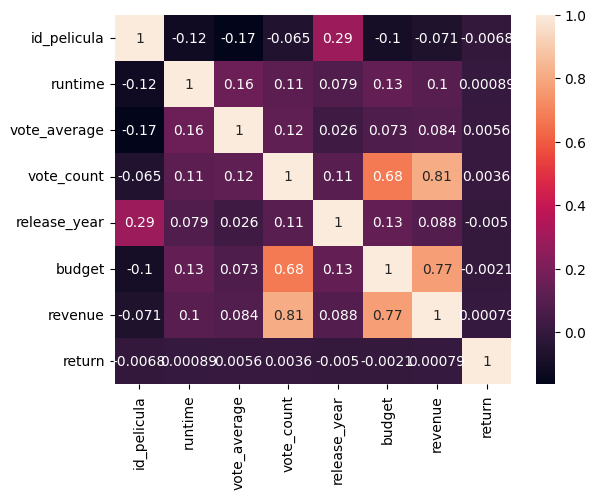

In [101]:
import seaborn as sns

corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True)

In [ ]:
df_todo=pd.merge(,)

# Sistema de recomendación

def recomendacion( titulo ): Se ingresa el nombre de una película y te recomienda las similares en una lista de 5 valores.